In [27]:
# General libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling libraries

## Data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier,AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)

# Import metrics

## Classification metrics
from sklearn.metrics import classification_report

## Regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [28]:
# Import the csv file
RealEstate = pd.read_csv('RealEstate.csv')

In [29]:
RealEstate.head()

Price  sqft  beds  bath  age  stories  vacant
0  163.00  2727     5     3    8        2       0
1   88.00  1069     3     2    5        1       0
2  165.00  2846     4     3   56        2       0
3  150.00  1790     4     3   36        2       0
4  159.95  2200     4     2   28        1       0

In [30]:
RealEstate.describe()

Price         sqft        beds        bath         age  \
count  550.000000   550.000000  550.000000  550.000000  550.000000   
mean   113.234859  1614.318182    3.196364    2.067273   24.105455   
std     50.694375   527.829782    0.691864    0.672801   19.769523   
min     50.005000   751.000000    2.000000    1.000000    0.000000   
25%     80.428500  1196.250000    3.000000    2.000000    9.000000   
50%    101.596500  1518.500000    3.000000    2.000000   18.000000   
75%    130.000000  1900.000000    4.000000    2.000000   38.000000   
max    460.000000  4278.000000    6.000000    5.000000   96.000000   

          stories      vacant  
count  550.000000  550.000000  
mean     1.216364    0.636364  
std      0.412140    0.481484  
min      1.000000    0.000000  
25%      1.000000    0.000000  
50%      1.000000    1.000000  
75%      1.000000    1.000000  
max      2.000000    1.000000

In [31]:
RealEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    550 non-null    float64
 1   sqft     550 non-null    int64  
 2   beds     550 non-null    int64  
 3   bath     550 non-null    int64  
 4   age      550 non-null    int64  
 5   stories  550 non-null    int64  
 6   vacant   550 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 30.2 KB


[Text(0.5, 1.0, 'Price vs stories')]

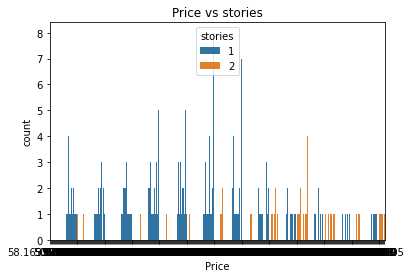

In [32]:
#How is the price related to stories
sns.countplot(x='Price' , hue = 'stories', data = RealEstate).set(title='Price vs stories')

<AxesSubplot:>

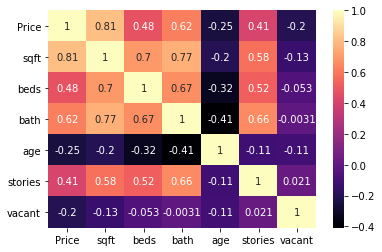

In [33]:
# Heatmap

# Corr amtrix
corr_matrix = RealEstate.corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap='magma', annot=True)

In [34]:
RealEstate.duplicated().sum() 

3

In [35]:
RealEstate.isnull().sum()

Price      0
sqft       0
beds       0
bath       0
age        0
stories    0
vacant     0
dtype: int64

In [36]:
#Feature engineering
ReslEstate_drop=["vacant"]
RealEstate.drop(ReslEstate_drop, axis=1, inplace=True)

In [37]:
RealEstate.head()

Price  sqft  beds  bath  age  stories
0  163.00  2727     5     3    8        2
1   88.00  1069     3     2    5        1
2  165.00  2846     4     3   56        2
3  150.00  1790     4     3   36        2
4  159.95  2200     4     2   28        1

In [38]:
RealEstate.duplicated().sum()

3

In [39]:
RealEstate.drop_duplicates(subset=None, keep=False,inplace=False)

Price  sqft  beds  bath  age  stories
0    163.0000  2727     5     3    8        2
1     88.0000  1069     3     2    5        1
2    165.0000  2846     4     3   56        2
3    150.0000  1790     4     3   36        2
4    159.9500  2200     4     2   28        1
..        ...   ...   ...   ...  ...      ...
545  160.3950  2559     5     3    4        2
546  324.6195  2891     4     4    5        2
547  102.6750  1342     4     2   49        1
548   63.2700  1122     3     1   48        1
549  120.9900  1577     4     2    7        2

[545 rows x 6 columns]

In [40]:
RealEstate.duplicated().sum()

3

In [41]:
Real_Estate=RealEstate.copy()

In [42]:
#Modelling
# Split the data
x = Real_Estate.drop('Price', axis=1)
y = Real_Estate['Price']

In [43]:
# split into train and test and validation

# Splt into train and a preliminary dataset which we shall split into test and validate
x_train, x_hold, y_train, y_hold = train_test_split(x, y, train_size=0.7, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_hold, y_hold, test_size=0.5, random_state=42)

In [58]:
#For model training we shall use various models 
#regression,xG boost,LinearRegression e.t.c
# Model trainer

def model_trainer(models, x_train, x_val, y_train, y_val):
    '''
  Trains the model
  '''
  
    for model in models:
        model.fit(x_train, y_train)
        predictions = model.predict(x_val)
        mae = mean_absolute_error(y_val, predictions)
        rmse = mean_squared_error(y_val, predictions, squared=False)
        r2 = r2_score(y_val, predictions)
        print(f'Model {model} , rmse: {rmse}, r2_score: {r2}, mae: {mae}')


In [59]:
# Define models
lr = LinearRegression()
rf = RandomForestRegressor()
adaboost = AdaBoostRegressor()
gb = GradientBoostingRegressor()
sv = SVR()
dt = DecisionTreeRegressor()

reg_models = [lr, rf, adaboost, gb, sv, dt]

In [60]:
# Train and evaluate
model_trainer(reg_models, x_train, x_val, y_train, y_val)

Model LinearRegression() , rmse: 29.197907531840208, r2_score: 0.739583553543226, mae: 21.711841746824266
Model RandomForestRegressor() , rmse: 25.35877609500014, r2_score: 0.8035637978828786, mae: 18.066178330720092
Model AdaBoostRegressor() , rmse: 30.531487853892944, r2_score: 0.7152518650464234, mae: 21.98145185267198
Model GradientBoostingRegressor() , rmse: 28.362820472443044, r2_score: 0.7542668302321333, mae: 19.65801216012983
Model SVR() , rmse: 48.180985769314454, r2_score: 0.2908855859669204, mae: 25.620146316493695
Model DecisionTreeRegressor() , rmse: 33.27039468724089, r2_score: 0.6618722173098153, mae: 22.724526219512196


In [61]:
# final evaluation with test data set

predictions = gb.predict(x_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(rmse)


22.447578399575466
